# IE 5374: Foundations of Data Analytics
# Project 3 - Group 67

#Importing the required libraries

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
from nltk.probability import FreqDist
from nltk import bigrams
import dateutil
import networkx as nx

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# TASK 1

1. Download the dataset(https://docs.google.com/spreadsheets/d/1GTwv07i98vL7S-J9eeP8NV1fJVnymm1eJ31RDyt4Mxw/edit?usp=sharing)

2. Write a Python code to extract keyword data from the above file and convert it to a weighted adjacency matrix. 

3. Read the adjacency matrix and convert it into a weighted network

4. Compute node degree and strength

5. Show the top 10 nodes by degree and top 10 nodes by strength

6. Show the top 10 node pairs by weight

7. Plot average strength on y-axis and degree on x-axis

# Loading Dataset

In [224]:
from google.colab import files
uploaded = files.upload()

Saving Keyword_data.csv to Keyword_data.csv


# Creating Weighted Adjacency Matrix

In [225]:
key = pd.read_csv('Keyword_data.csv', usecols = [ 'Keyword 1', 'Keyword 2','Keyword 3','Keyword 4','Keyword 5','Keyword 6','Keyword 7','Keyword 8','Keyword 9','Keyword 10','Keyword 11','Keyword 12'])

In [226]:
test = pd.read_csv('Keyword_data.csv', usecols = [ 'Keyword 1', 'Keyword 2','Keyword 3','Keyword 4','Keyword 5','Keyword 6','Keyword 7','Keyword 8','Keyword 9','Keyword 10','Keyword 11','Keyword 12'])
test = test.dropna(how = 'all')

In [227]:
keywords = pd.DataFrame(key.iloc[:, :].stack().unique())
keywords = keywords.dropna()
keywords_ls = keywords

In [228]:
keywords = keywords.iloc[:, 0].to_list()

map_keyword_to_num = {}
counter = 0

for keyword in keywords:
  map_keyword_to_num[keyword] = counter
  counter = counter + 1

i = 0

matrix_of_keywords_in_articles = []

while i < test.shape[0]:
  j = 0
  values = []
  keywords_list_nums = []
  while j < test.shape[1]:
    values.append(test.iloc[i, j])
    j = j + 1
    
  for value in values:
    if str(value) != 'nan':
      keywords_list_nums.append(map_keyword_to_num[value])

  matrix_of_keywords_in_articles.append(keywords_list_nums)
    
  i = i + 1

In [229]:
#Creating and filling the matrix
adjacency_matrix = []
for i in range(248):
  adjacency_list = []
  for j in range(248):
    adjacency_list.append(0)
  adjacency_matrix.append(adjacency_list)




for row in matrix_of_keywords_in_articles:
  for i in range(0, len(row) - 1):
    for j in range(i + 1, len(row)):
      value1 = row[i]
      value2 = row[j]
      current_val1 =  adjacency_matrix[value1][value2]
      current_val2 = adjacency_matrix[value2][value1]

      adjacency_matrix[value1][value2] = current_val1 + 1
      adjacency_matrix[value2][value1] = current_val2 + 1

In [230]:
final_df = pd.DataFrame(adjacency_matrix, index=keywords_ls[0], columns=keywords_ls[0])

# Printing Weighted Adjacency Matrix

In [231]:
final_df

0                         EQUITY  ORGANIZATIONAL sociology  PERFORMANCE  \
0                                                                         
EQUITY                         0                         1            1   
ORGANIZATIONAL sociology       1                         0            2   
PERFORMANCE                    1                         2            0   
META-analysis                  1                         1            1   
PSYCHOMETRICS                  1                         1            1   
...                          ...                       ...          ...   
CUSTOMER relations             0                         0            0   
PRODUCTION management          0                         0            0   
LABOR process                  0                         0            0   
CUSTOMER orientation           0                         0            0   
MARKETING strategy             0                         0            0   

0                         META-analysis  PSYCHOMETRICS  \
0                                                        
EQUITY                                1              1   
ORGANIZATIONAL sociology              1              1   
PERFORMANCE                           1              1   
META-analysis                         0              1   
PSYCHOMETRICS                         1              0   
...                                 ...            ...   
CUSTOMER relations                    0              0   
PRODUCTION management                 0              0   
LABOR process                         0              0   
CUSTOMER orientation                  0              0   
MARKETING strategy                    0              0   

0                         ORGANIZATIONAL research  FINANCIAL performance  \
0                                                                          
EQUITY                                          1                      1   
ORGANIZATIONAL sociology                        2                      1   
PERFORMANCE                                     1                      1   
META-analysis                                   1                      1   
PSYCHOMETRICS                                   1                      1   
...                                           ...                    ...   
CUSTOMER relations                              0                      0   
PRODUCTION management                           0                      0   
LABOR process                                   0                      0   
CUSTOMER orientation                            0                      0   
MARKETING strategy                              0                      0   

0                         AGENCY theory  ORGANIZATIONAL effectiveness  \
0                                                                       
EQUITY                                1                             1   
ORGANIZATIONAL sociology              3                             4   
PERFORMANCE                           1                             3   
META-analysis                         1                             1   
PSYCHOMETRICS                         1                             1   
...                                 ...                           ...   
CUSTOMER relations                    0                             0   
PRODUCTION management                 0                             0   
LABOR process                         0                             0   
CUSTOMER orientation                  0                             0   
MARKETING strategy                    0                             0   

0                         ORGANIZATIONAL behavior  ...  WAGE payment systems  \
0                                                  ...                         
EQUITY                                          1  ...                     0   
ORGANIZATIONAL sociology                        6  ...                     0   
PERFORMANC

# Creating network

In [232]:
#Creating a graph object of the Weighted Adjacency matrix
vx = nx.from_pandas_adjacency(final_df)

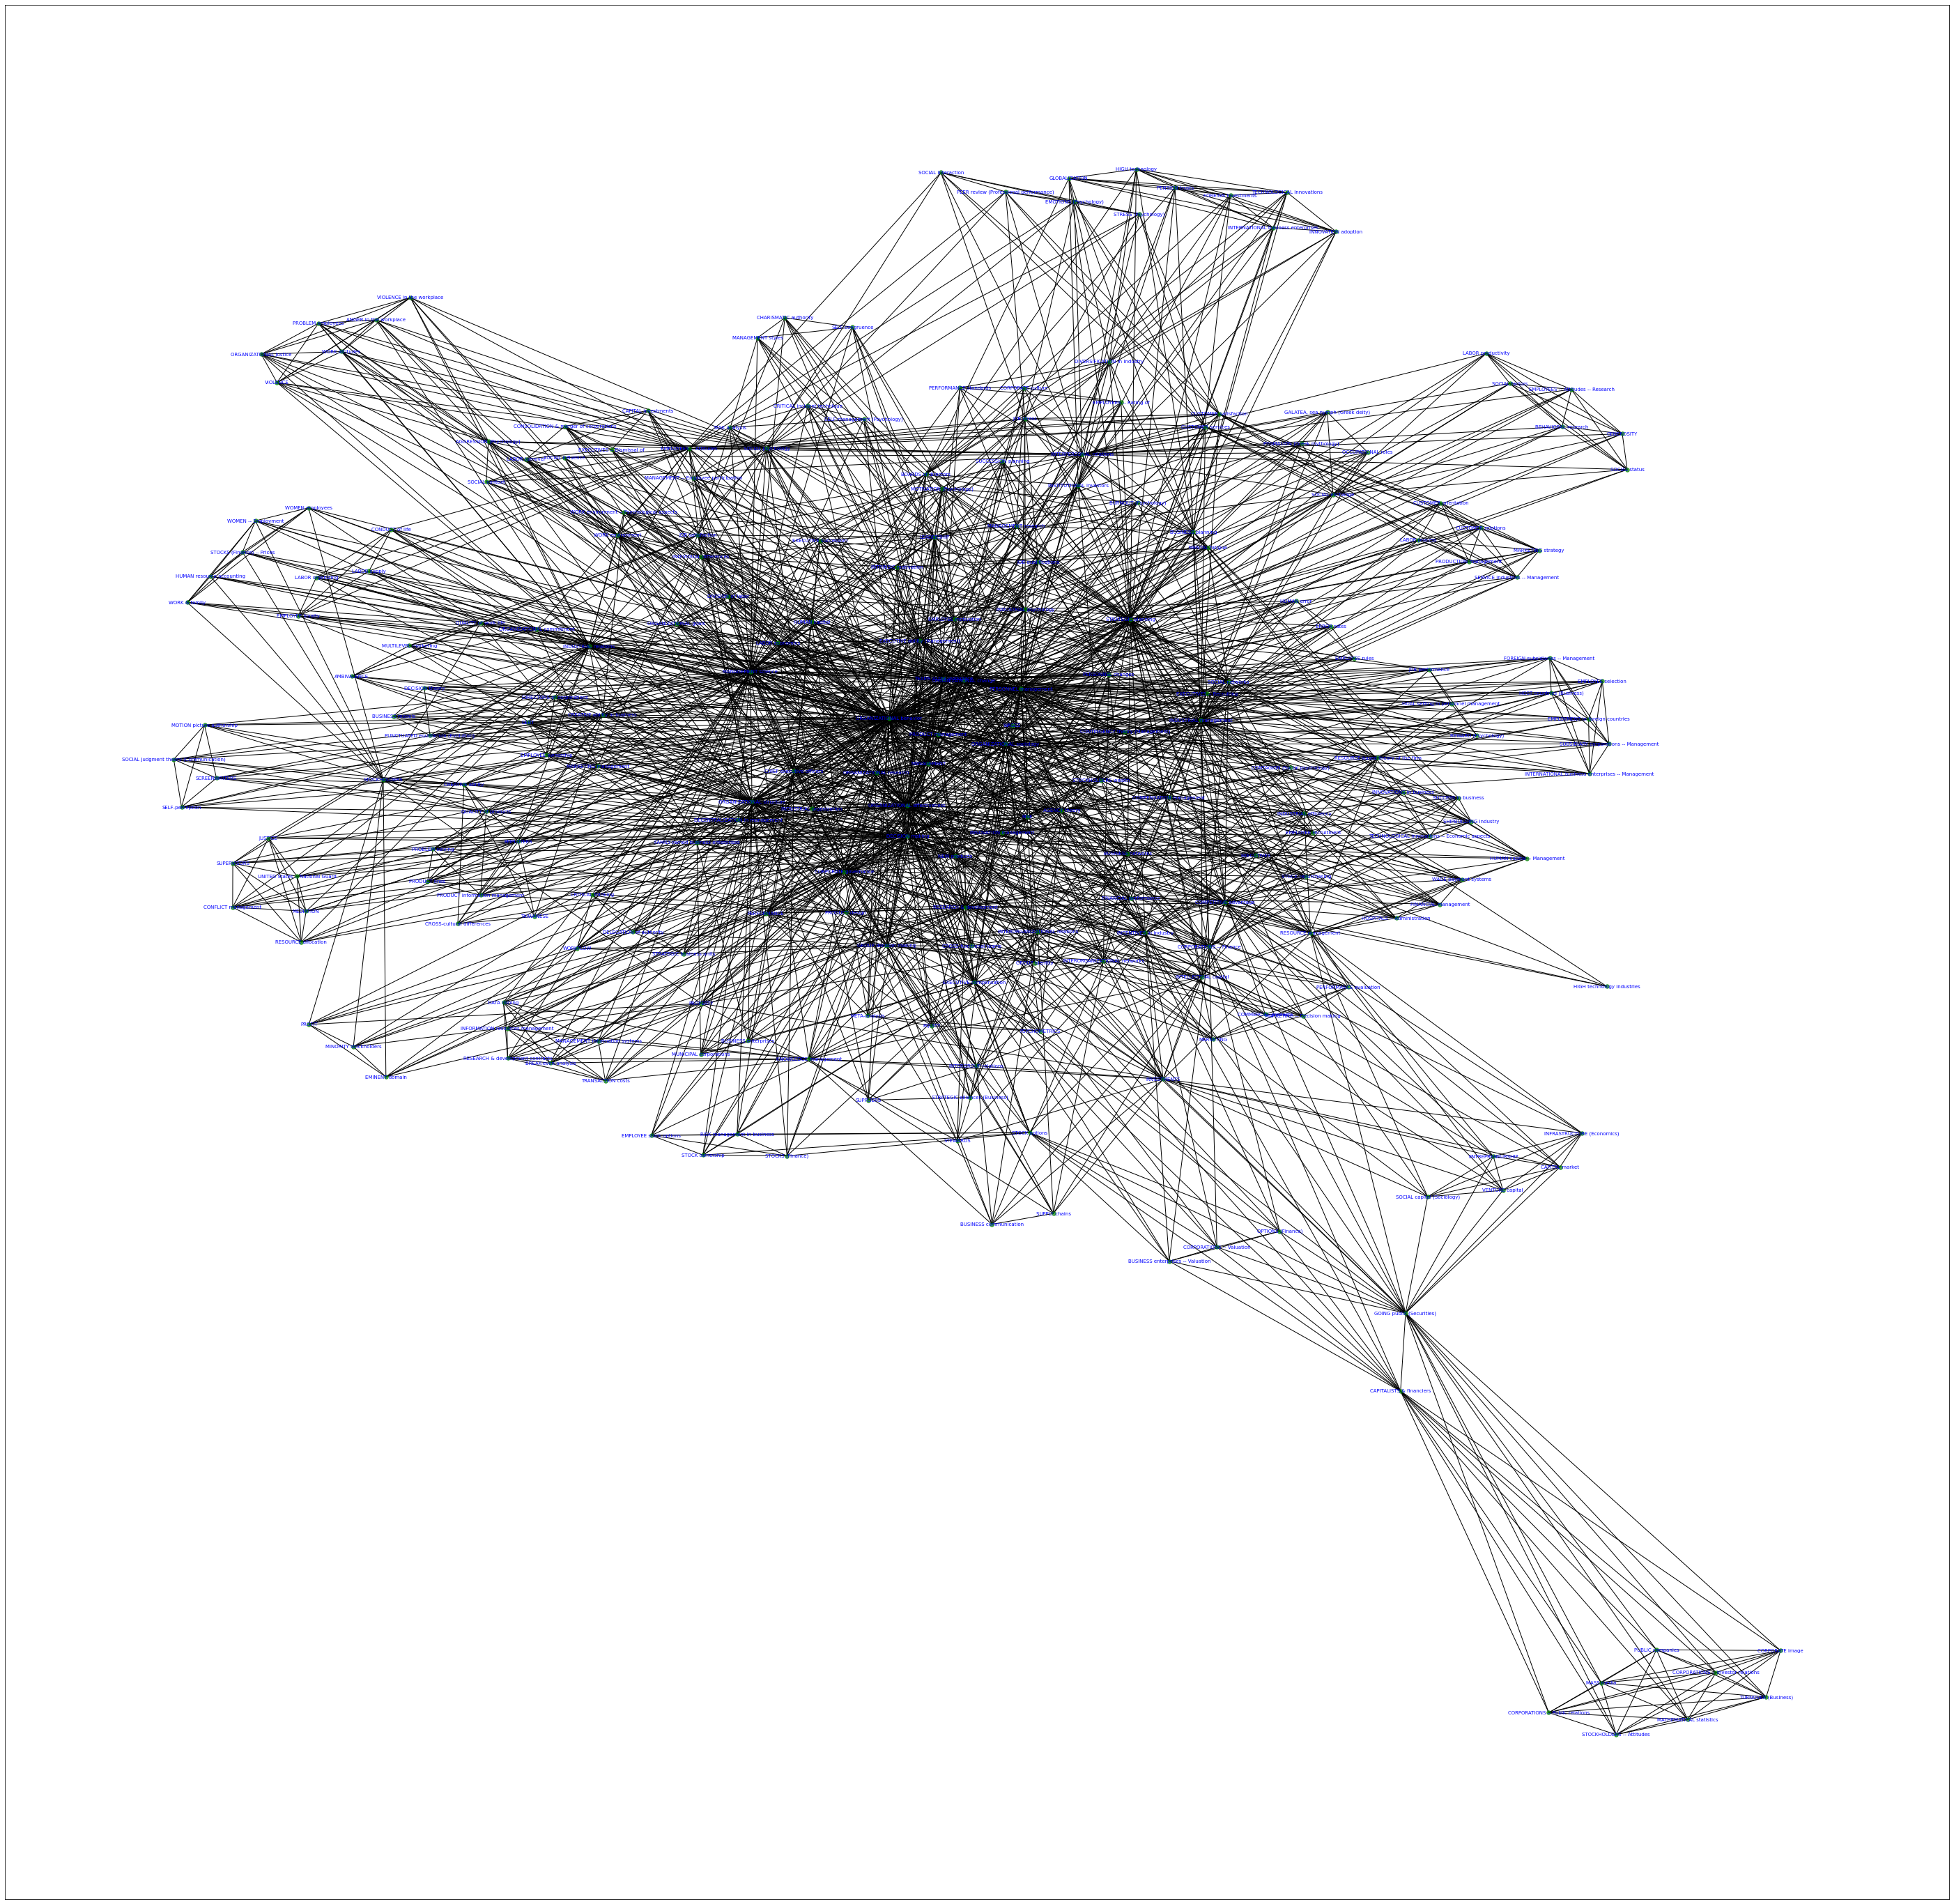

In [234]:
plt.figure(figsize = (50, 50))
gs = nx.spring_layout(vx)
nx.draw_networkx_nodes(vx, gs, node_size = 30, node_color='green', alpha = 0.7)
nx.draw_networkx_edges(vx, gs, width = 1)
nx.draw_networkx_labels(vx, gs, font_size = 7, font_color='blue')
plt.show()

# Computing Node degree and Strength

In [235]:
df_s_d = pd.DataFrame(columns = ['Node', 'Degree', 'Strength'])

In [236]:
#Adding rows into the dataframe after computing Degree and Strength
for noden in final_df.columns:
  df_s_d = df_s_d.append({'Node': noden, 'Degree': (final_df[noden] != 0).sum(), 'Strength': final_df[noden].sum()}, ignore_index=True)

In [237]:
df_s_d

Node Degree Strength
0                      EQUITY     10       10
1    ORGANIZATIONAL sociology     66       96
2                 PERFORMANCE     23       29
3               META-analysis     10       10
4               PSYCHOMETRICS     10       10
..                        ...    ...      ...
243        CUSTOMER relations     11       11
244     PRODUCTION management     11       11
245             LABOR process     11       11
246      CUSTOMER orientation     11       11
247        MARKETING strategy     11       11

[248 rows x 3 columns]

# To display top 10 nodes by Strength

In [238]:
df_s_d.sort_values(by = 'Strength', ascending = False).head(10)

Node Degree Strength
9        ORGANIZATIONAL behavior    166      265
8   ORGANIZATIONAL effectiveness    104      144
17            MANAGEMENT science    102      136
33          PERSONNEL management     93      126
43               DECISION making     90      112
66      ORGANIZATIONAL structure     74      107
1       ORGANIZATIONAL sociology     66       96
10          CORPORATE governance     62       85
69         INDUSTRIAL management     64       84
16            STRATEGIC planning     66       80

# To display top 10 nodes by Degree

In [239]:
df_s_d.sort_values(by = 'Degree', ascending = False).head(10)

Node Degree Strength
9        ORGANIZATIONAL behavior    166      265
8   ORGANIZATIONAL effectiveness    104      144
17            MANAGEMENT science    102      136
33          PERSONNEL management     93      126
43               DECISION making     90      112
66      ORGANIZATIONAL structure     74      107
16            STRATEGIC planning     66       80
1       ORGANIZATIONAL sociology     66       96
69         INDUSTRIAL management     64       84
10          CORPORATE governance     62       85

# To display top 10 node pairs by Weight

In [240]:
df_w = pd.DataFrame(columns = ['Node 1', 'Node 2', 'Weight'])

In [241]:
#Adding into the dataframe the weight of two nodes and name of the nodes
for i in range(final_df.shape[0]):
  for j in range(final_df.shape[1]):
    x = final_df.index[i]
    y = final_df.columns[j]

    df_w = df_w.append({'Node 1': x, 'Node 2': y, 'Weight': final_df.loc[x , y ]}, ignore_index=True)

In [242]:
df_w_t = df_w.sort_values(by ='Weight', ascending= False ).head(20)
df_w_sorted = df_w_t.loc[df_w_t.index[range(0, df_w_t.shape[0], 2)], :]

In [243]:
df_w_sorted

Node 1                        Node 2 Weight
1993   ORGANIZATIONAL effectiveness       ORGANIZATIONAL behavior     11
2298        ORGANIZATIONAL behavior      ORGANIZATIONAL structure      9
8193           PERSONNEL management       ORGANIZATIONAL behavior      8
4225             MANAGEMENT science       ORGANIZATIONAL behavior      7
10673               DECISION making       ORGANIZATIONAL behavior      6
2275        ORGANIZATIONAL behavior               DECISION making      6
16376      ORGANIZATIONAL structure  ORGANIZATIONAL effectiveness      6
257        ORGANIZATIONAL sociology       ORGANIZATIONAL behavior      6
384        ORGANIZATIONAL sociology        TEAMS in the workplace      5
2297        ORGANIZATIONAL behavior         ORGANIZATIONAL change      5

# Plotting graph for Degree and Average Strength

In [244]:
indexn = []
for index, row in df_s_d.iterrows():
  if row['Degree'] == 0:
    indexn.append(index)

df_s_d.drop(indexn, inplace = True)

In [245]:
df_s_d['Average Strength'] = df_s_d['Strength']/df_s_d['Degree']

Text(0, 0.5, 'Average Strength')

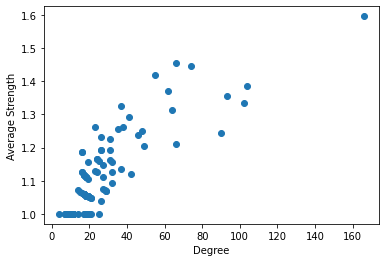

In [246]:
plt.scatter(df_s_d['Degree'], df_s_d['Average Strength'])
plt.xlabel('Degree')
plt.ylabel('Average Strength')

# TASK 2

The link provides the twitter data of Elon Musk from2010-2022. For analysis consider the years 2017-2022. Each year has thousands of tweets. Assume each year to be a document (all the tweets in one year will be considered as a document).
1. Compute word frequencies for each year. Exclude the stop words

2. Show top 10 words (for each year) by the highest value of word frequency

3. Plot histogram of word frequencies for each year

4. Use Zipf’s law and plot log-log plots of word frequencies and rank for each year

5. Create bigram network graphs for each year

In [138]:
tw_df_2017 = pd.read_csv('data1.csv') # twitter data for year 2017(data1.csv)
tw_df_2018 = pd.read_csv('data2.csv') # twitter data for year 2018(data2.csv)
tw_df_2019 = pd.read_csv('data3.csv') # twitter data for year 2019(data3.csv)
tw_df_2020 = pd.read_csv('data4.csv') # twitter data for year 2020(data4.csv)
tw_df_2021 = pd.read_csv('data5.csv') # twitter data for year 2021(data5.csv)
tw_df_2022 = pd.read_csv('data6.csv') # twitter data for year 2022(data6.csv)
print(tw_df_2017.head(2))
print(tw_df_2018.head(2))
print(tw_df_2019.head(2))
print(tw_df_2020.head(2))
print(tw_df_2021.head(2))
print(tw_df_2022.head(2))

   Unnamed: 0                  id     conversation_id    created_at  \
0           0  945814723521417217  945712432416137217  1.514335e+12   
1           1  945749747129659392  945712432416137217  1.514319e+12   

                  date  timezone  place  \
0  2017-12-27 00:32:57         0    NaN   
1  2017-12-26 20:14:45         0    NaN   

                                          tweet language hashtags  ... geo  \
0           @neilsiegel @Tesla Coming very soon       en       []  ... NaN   
1  @Kreative Vastly better maps/nav coming soon       en       []  ... NaN   

   source  user_rt_id user_rt retweet_id  \
0     NaN         NaN     NaN        NaN   
1     NaN         NaN     NaN        NaN   

                                            reply_to  retweet_date translate  \
0  [{'screen_name': 'neilsiegel', 'name': 'Neil S...           NaN       NaN   
1  [{'screen_name': 'Kreative', 'name': 'Leslie',...           NaN       NaN   

  trans_src trans_dest  
0       NaN        NaN

In [142]:
# Defining the function data_Cleaning for cleaning the data
def data_Cleaning(t):
  t = re.sub("[@&#][A-Za-z0-9_]+"," ", t.lower()) # To remove mentions(@), and special characters like & and hashtags(#)
  t = re.sub(r'http\S+', ' ', t) # To remove hyper links
  t = re.sub(r"www.\S+", " ", t)
  t = re.sub("[^a-z0-9]"," ", t) # To remove characters which are not alphanumeric
  t = re.sub('[()!?]', ' ', t) # To remove punctuations
  t = re.sub('\[.*?\]',' ', t)
  t = re.sub(r'[0-9]+', ' ', t) # To remove numbers
  word_tokens = word_tokenize(t)      # To tokenize words 
  filtered_tweet_words = [w for w in word_tokens if not w in stop_words] # To remove stop words and return filtered 
  return ' '.join(filtered_tweet_words)
    

In [143]:
# Applying data_Cleaning for tweet columns for each year in df_2017, df_2018, df_2019,df_2020,df_2021, df_2022
tw_df_2017['tweet'] = tw_df_2017['tweet'].apply(data_Cleaning) 
tw_df_2018['tweet'] = tw_df_2018['tweet'].apply(data_Cleaning)
tw_df_2019['tweet'] = tw_df_2019['tweet'].apply(data_Cleaning) 
tw_df_2020['tweet'] = tw_df_2020['tweet'].apply(data_Cleaning)
tw_df_2021['tweet'] = tw_df_2021['tweet'].apply(data_Cleaning)
tw_df_2022['tweet'] = tw_df_2022['tweet'].apply(data_Cleaning)
tw_df_2022.head()

id      conversation_id  \
0  1500030191837589510  1499972826828259328   
1  1500028396436340736  1499802655421448192   
2  1500026380704178178  1499972826828259328   
3  1500010328758923264  1499976967105433600   
4  1499982913949081600  1499976967105433600   

                                  created_at        date      time  timezone  \
0  2022-03-05 12:47:21 Arabian Standard Time  2022-03-05  12:47:21       400   
1  2022-03-05 12:40:13 Arabian Standard Time  2022-03-05  12:40:13       400   
2  2022-03-05 12:32:12 Arabian Standard Time  2022-03-05  12:32:12       400   
3  2022-03-05 11:28:25 Arabian Standard Time  2022-03-05  11:28:25       400   
4  2022-03-05 09:39:29 Arabian Standard Time  2022-03-05  09:39:29       400   

    user_id  username       name  place  ... geo source user_rt_id user_rt  \
0  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN        NaN     NaN   
1  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN        NaN     NaN   
2  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN        NaN     NaN   
3  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN        NaN     NaN   
4  44196397  elonmusk  Elon Musk    NaN  ... NaN    NaN        NaN     NaN   

  retweet_id                                           reply_to  retweet_date  \
0        NaN  [{'screen_name': 'SpacePadreIsle', 'name': 'SP...           NaN   
1        NaN  [{'screen_name': 'teslaownersSV', 'name': 'Tes...           NaN   
2        NaN  [{'screen_name': 'SpacePadreIsle', 'name': 'SP...           NaN   
3        NaN  [{'screen_name': 'RationalEtienne', 'name': 'P...           NaN   
4        NaN  [{'screen_name': 'RogerYar', 'name': 'Дід Пана...           NaN   

   translate trans_src trans_dest  
0        NaN       NaN        NaN  
1        NaN       NaN        NaN  
2        NaN       NaN        NaN  
3        NaN       NaN        NaN  
4        NaN       NaN        NaN  

[5 rows x 36 columns]

In [144]:
# To drop NA values from the tweet column
tw_df_2017.tweet.dropna()
tw_df_2018.tweet.dropna()
tw_df_2019.tweet.dropna()
tw_df_2020.tweet.dropna()
tw_df_2021.tweet.dropna()
tw_df_2022.tweet.dropna()

0                                        way free qa haha
1                                     beautiful home life
2       starlink terminals near conflict areas jammed ...
3                                                 exactly
4                news sources partially propaganda others
                              ...                        
1023                                                     
1024                              let make roaring happen
1025                      great work tesla team worldwide
1026                                                     
1027                                                     
Name: tweet, Length: 1028, dtype: object

In [145]:
# To calculate word frquency for each year from 2017 to year 2022
word_freq_2017= nltk.FreqDist(word_tokenize(''.join(tw_df_2017['tweet'].astype(str).str.cat(sep=' '))))
word_freq_2018 = nltk.FreqDist(word_tokenize(''.join(tw_df_2018['tweet'].astype(str).str.cat(sep=' '))))
word_freq_2019 = nltk.FreqDist(word_tokenize(''.join(tw_df_2019['tweet'].astype(str).str.cat(sep=' '))))
word_freq_2020= nltk.FreqDist(word_tokenize(''.join(tw_df_2020['tweet'].astype(str).str.cat(sep=' '))))
word_freq_2021 = nltk.FreqDist(word_tokenize(''.join(tw_df_2021['tweet'].astype(str).str.cat(sep=' '))))
word_freq_2022 = nltk.FreqDist(word_tokenize(''.join(tw_df_2022['tweet'].astype(str).str.cat(sep=' '))))


In [156]:
# To compute word frequencies for the year 2017
df_word_freq_2017 = pd.DataFrame(word_freq_2017.items(),columns =['Word','Freq']).sort_values(['Freq'],ascending =False)
df_word_freq_2017

Word  Freq
104        tesla   312
56         model   208
64          good   171
187       rocket   149
37          like   137
...          ...   ...
3311    sabotage     1
3312    theories     1
3313       insta     1
3315         men     1
5894  pretending     1

[5895 rows x 2 columns]

In [157]:
# To show top 10 words (for each year) by the highest value of word frequency
df_word_freq_2017.head(10)

Word  Freq
104   tesla   312
56    model   208
64     good   171
187  rocket   149
37     like   137
156     yes   132
183  launch   112
52     next   103
113   would   100
467     car    99

In [158]:
# To compute word frequency for the year 2018 and display the dataframe
df_word_freq_2018 = pd.DataFrame(word_freq_2018.items(),columns =['Word','Freq']).sort_values(['Freq'],ascending =False)
df_word_freq_2018

Word  Freq
1          tesla   291
112          car   121
28           yes   108
187         good   102
134        model    98
...          ...   ...
2820    grimoire     1
2821      joined     1
2822  fellowship     1
2828      malala     1
5148     roaming     1

[5149 rows x 2 columns]

In [159]:
# To display dataframe with top 10 words with highest frequency in the year 2018
df_word_freq_2018.head(10)

Word  Freq
1     tesla   291
112     car   121
28      yes   108
187    good   102
134   model    98
102    like    95
285   would    77
70   people    74
206    even    65
64     next    64

In [160]:
# To compute word frequency for the year 2019 and display the dataframe
df_word_freq_2019 = pd.DataFrame(word_freq_2019.items(),columns =['Word','Freq']).sort_values(['Freq'],ascending =False)
df_word_freq_2019

Word  Freq
195       tesla   852
106         yes   393
680       model   373
42         good   358
487        like   315
...         ...   ...
5746    springy     1
5745   syndrome     1
5744  stockholm     1
5743        fda     1
9547       nuys     1

[9548 rows x 2 columns]

In [161]:
# To display dataframe with top 10 words with highest frequency in the year 2019
df_word_freq_2019.head(10)

Word  Freq
195  tesla   852
106    yes   393
680  model   373
42    good   358
487   like   315
219    car   287
55   would   275
191  great   243
206   time   224
485   next   222

In [162]:
# To compute word frequency for the year 2020 and display the dataframe
df_word_freq_2020 = pd.DataFrame(word_freq_2020.items(),columns =['Word','Freq']).sort_values(['Freq'],ascending =False)
df_word_freq_2020

Word  Freq
11           tesla  1053
74             yes   554
51            good   471
232          model   403
73            like   395
...            ...   ...
7616       siewert     1
7615          brad     1
3503   necessitate     1
7613   trademarked     1
11205         nuys     1

[11206 rows x 2 columns]

In [163]:
# To display top 10 words with highest frequency in the year 2020
df_word_freq_2020.head(10)

Word  Freq
11   tesla  1053
74     yes   554
51    good   471
232  model   403
73    like   395
25   great   372
393  would   371
16     car   329
200   much   310
141    one   291

In [164]:
# To compute word frequency for the year 2021 and display the dataframe
df_word_freq_2021 = pd.DataFrame(word_freq_2021.items(),columns =['Word','Freq']).sort_values(['Freq'],ascending =False)
df_word_freq_2021

Word  Freq
48        tesla   213
65        great   102
143        good    98
111        much    93
156       would    89
...         ...   ...
3113       vtol     1
1172   diseases     1
3115    explode     1
3116     valued     1
4938  surviving     1

[4939 rows x 2 columns]

In [165]:
# To display top 10 words with highest frequency in the year 2021
df_word_freq_2021.head(10)

Word  Freq
48   tesla   213
65   great   102
143   good    98
111   much    93
156  would    89
96    haha    89
117   like    89
32    time    86
808   beta    77
928   high    74

In [166]:
# To compute word frequency for the year 2022 and display the dataframe
df_word_freq_2022 = pd.DataFrame(word_freq_2022.items(),columns =['Word','Freq']).sort_values(['Freq'],ascending =False)
df_word_freq_2022

Word  Freq
63       tesla    62
54      people    34
107        yes    32
60       would    32
245        one    30
...        ...   ...
672     reason     2
674    federal     2
676   overpaid     2
677      stole     2
1448    happen     2

[1449 rows x 2 columns]

In [167]:
# To display top 10 words with highest frequency in the year 2022
df_word_freq_2022.head(10)

Word  Freq
63      tesla    62
54     people    34
107       yes    32
60      would    32
245       one    30
323      good    28
7    starlink    28
158       car    26
134      high    22
689      true    22

# Plotting Histogram for tweet data for each year

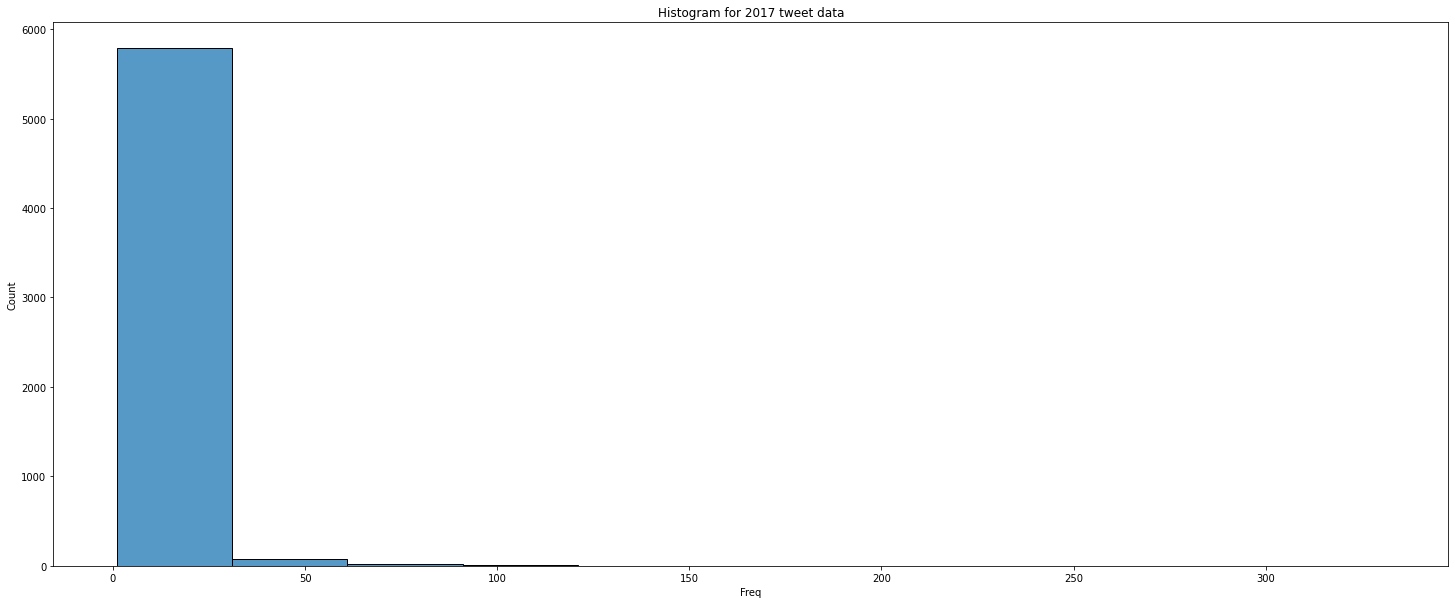

In [169]:
# Hist for year 2017
plt.figure(figsize=(25,10))
plt.title("Histogram for 2017 tweet data")
sns.histplot(data = df_word_freq_2017['Word'],x=df_word_freq_2017['Freq'], binwidth=30,bins =20)

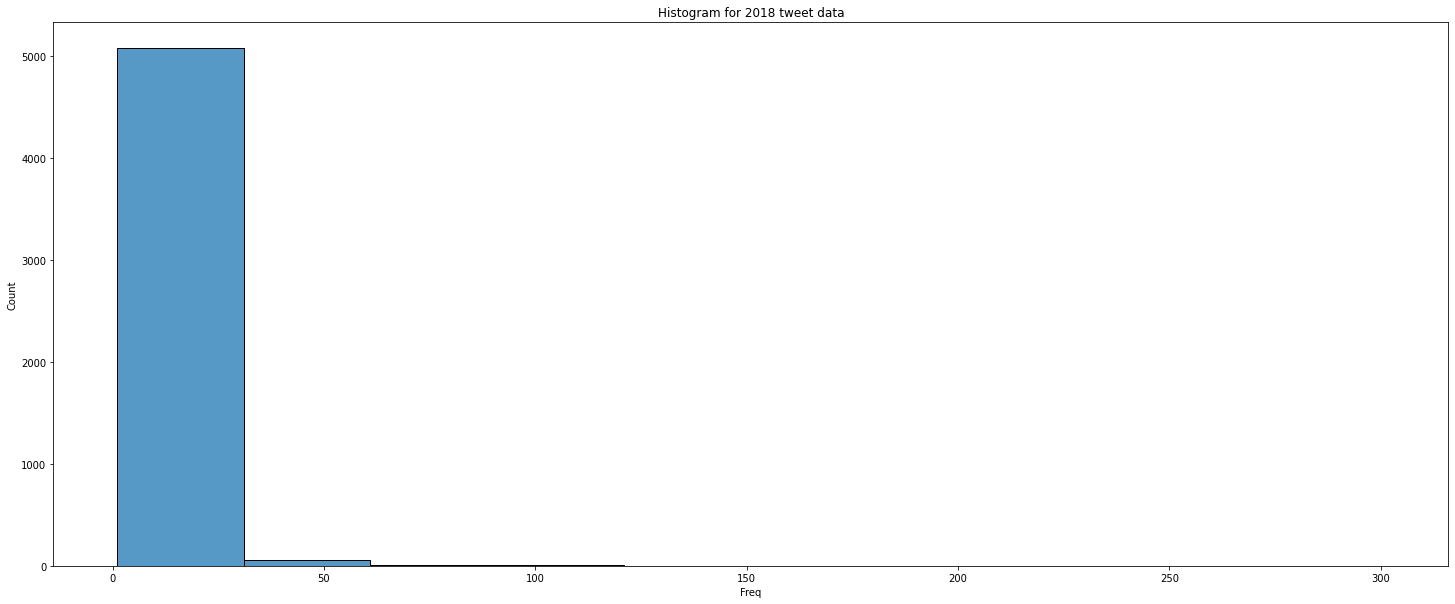

In [170]:
# Hist for year 2018
plt.figure(figsize=(25,10))
plt.title("Histogram for 2018 tweet data")
sns.histplot(data = df_word_freq_2018['Word'],x=df_word_freq_2018['Freq'], binwidth=30,bins =20)

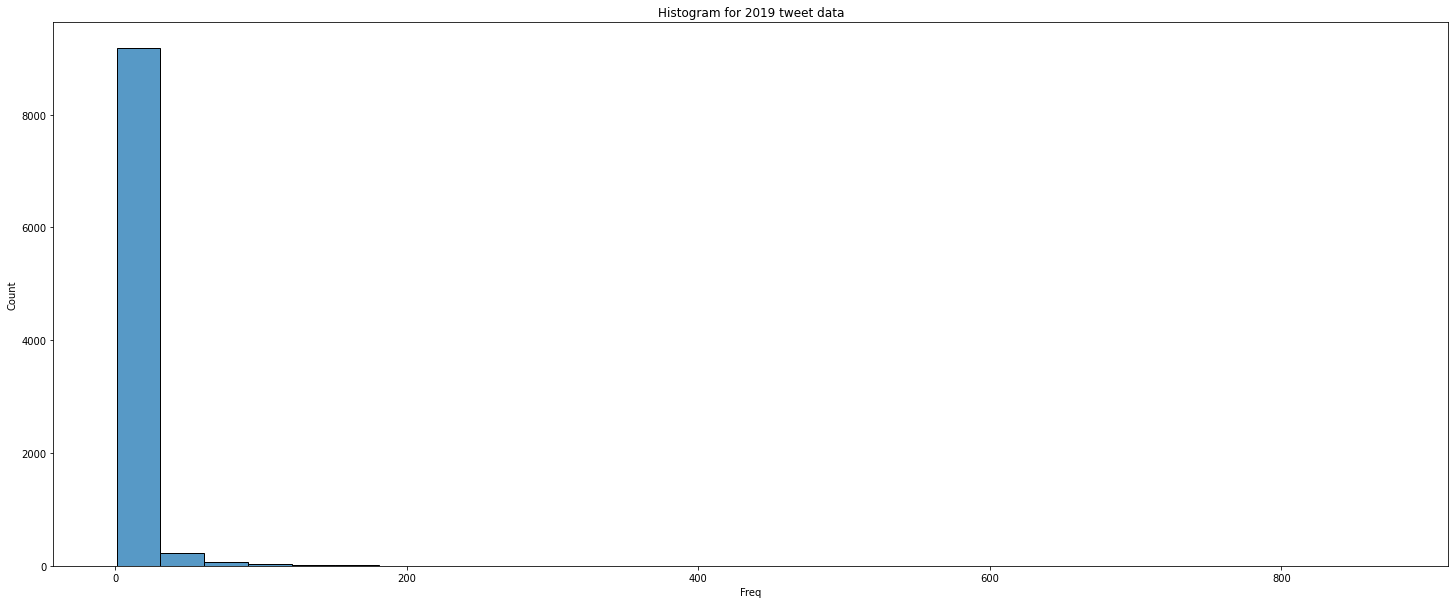

In [171]:
# Hist for year 2019
plt.figure(figsize=(25,10))
plt.title("Histogram for 2019 tweet data")
sns.histplot(data = df_word_freq_2019['Word'],x=df_word_freq_2019['Freq'], binwidth=30,bins =20)

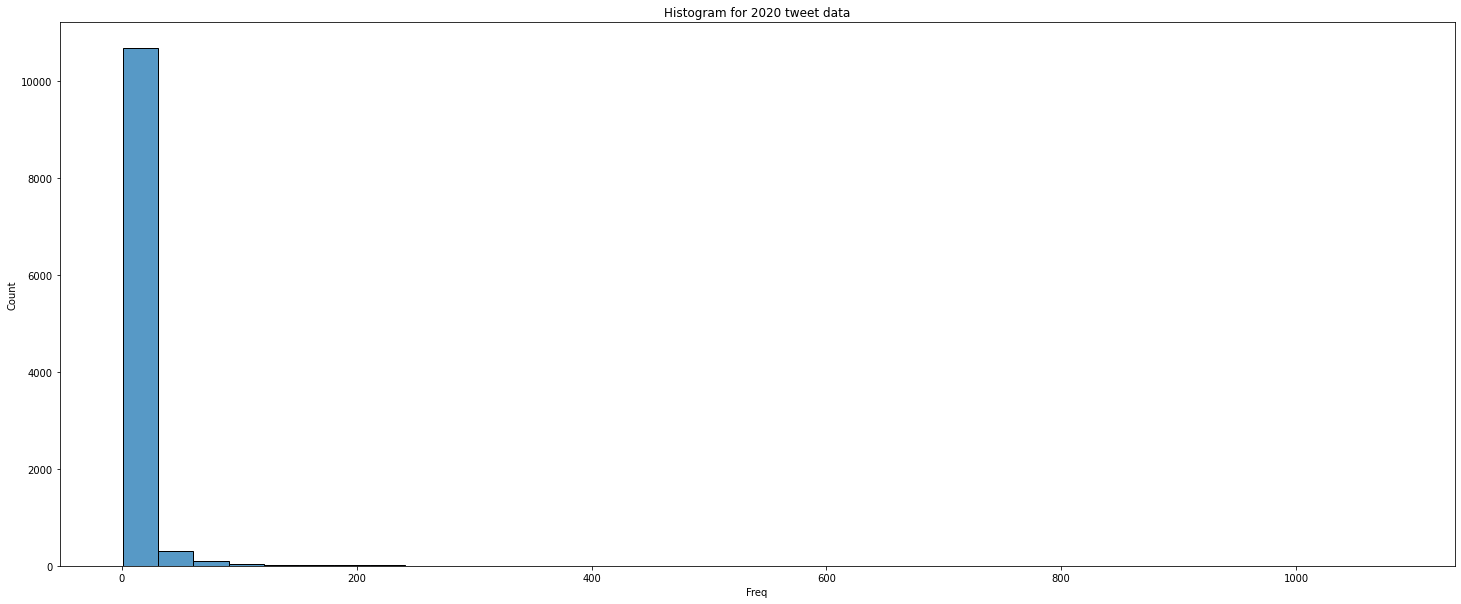

In [172]:
# Hist for year 2020
plt.figure(figsize=(25,10))
plt.title("Histogram for 2020 tweet data")
sns.histplot(data = df_word_freq_2020['Word'],x=df_word_freq_2020['Freq'], binwidth=30,bins =20)

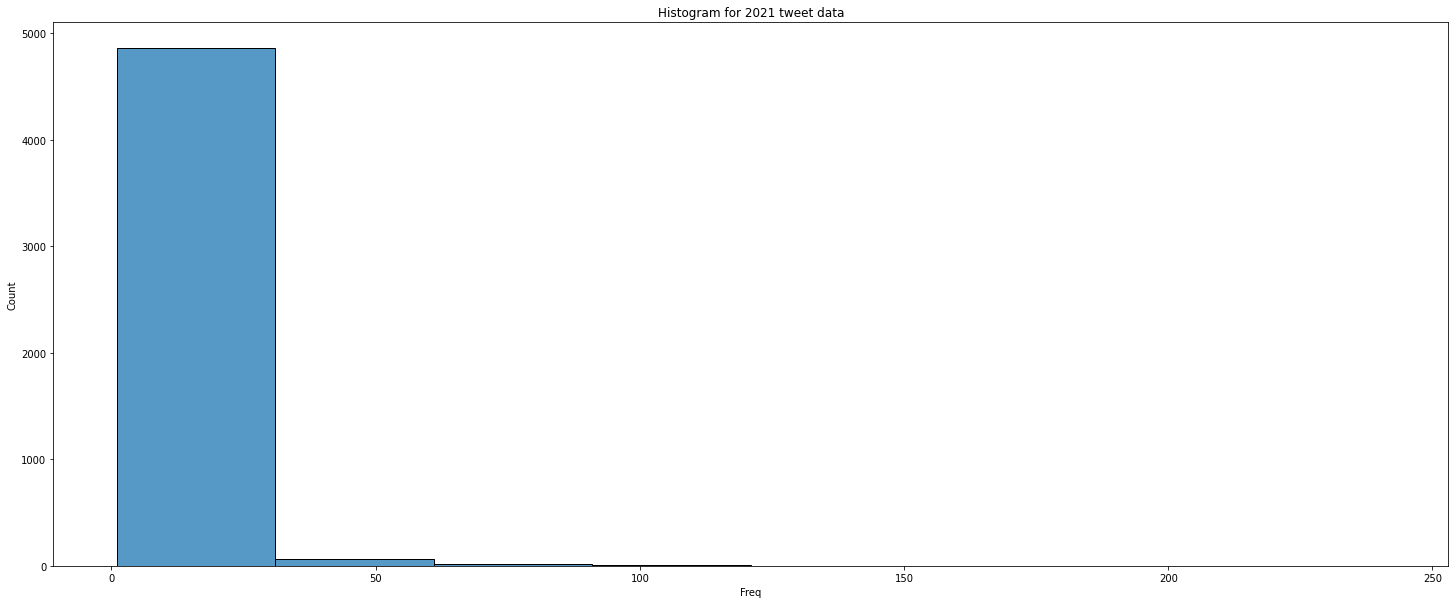

In [173]:
# Hist for year 2021
plt.figure(figsize=(25,10))
plt.title("Histogram for 2021 tweet data")
sns.histplot(data = df_word_freq_2021['Word'],x=df_word_freq_2021['Freq'], binwidth=30,bins =20)

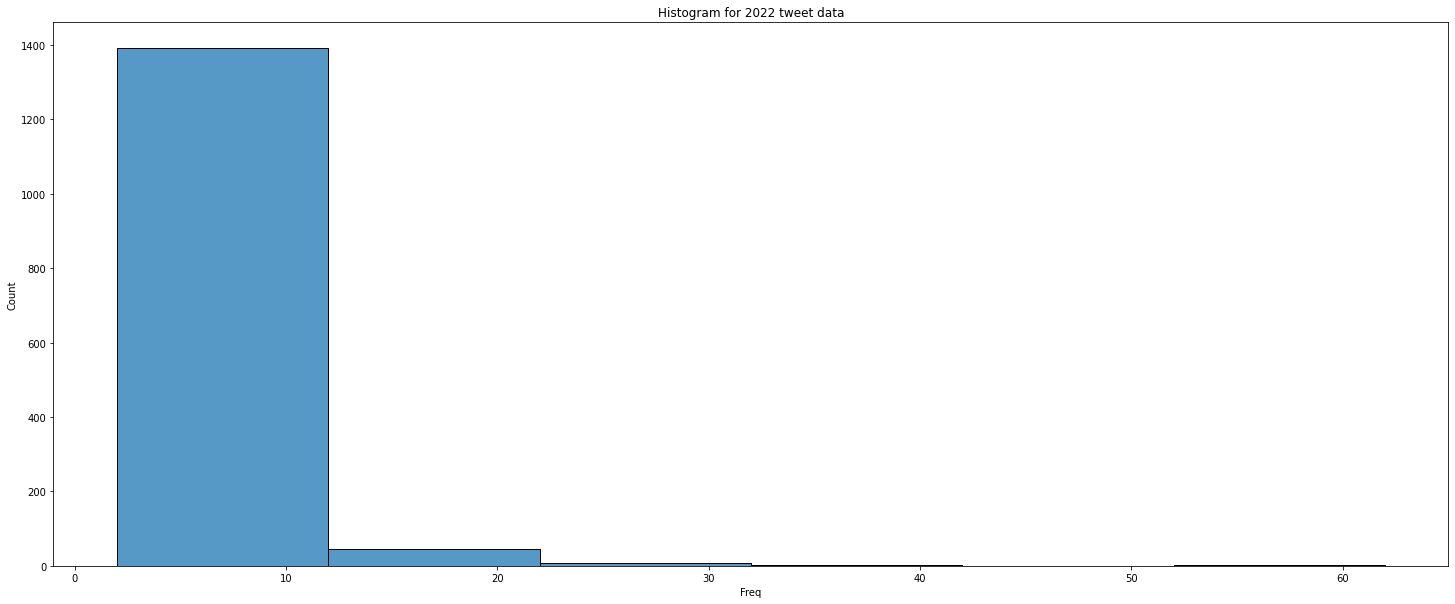

In [174]:
# Hist for year 2022
plt.figure(figsize=(25,10))
plt.title("Histogram for 2022 tweet data")
sns.histplot(data = df_word_freq_2022['Word'],x=df_word_freq_2022['Freq'], binwidth=10,bins =20)

#source - https://www.ccs.neu.edu/home/ekanou/ISU535.09X2/Handouts/Review_Material/zipfslaw.pdf

# Zipf's Law -
 
 Zipf's law is a law about the frequency distribution of words in a collection.For each word in the collection frqeuncy is computed and rank them in the recending order of their frequency. i.e., rank of a word is inversly proportional to it's frequency

In [176]:
# Calculating rank for the words according to its frequency for year 2017
df_word_freq_2017['Rank'] = range(1,len(df_word_freq_2017)+1)

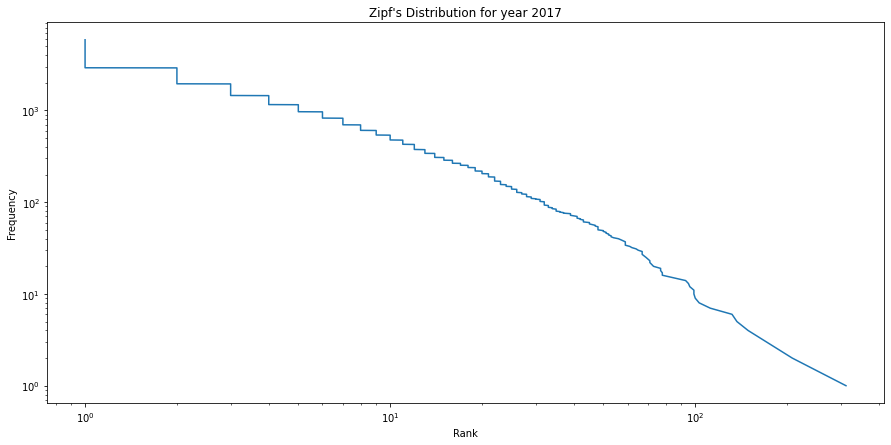

In [180]:
# log-log plot of word frequencies and rank for year 2017
plt.figure(figsize=(15,7))
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Distribution for year 2017")
plt.loglog(df_word_freq_2017['Freq'], df_word_freq_2017['Rank'] )
plt.show()

In [179]:
# Calculating rank for the words according to its frequency for year 2018
df_word_freq_2018['Rank'] = range(1,len(df_word_freq_2018)+1)

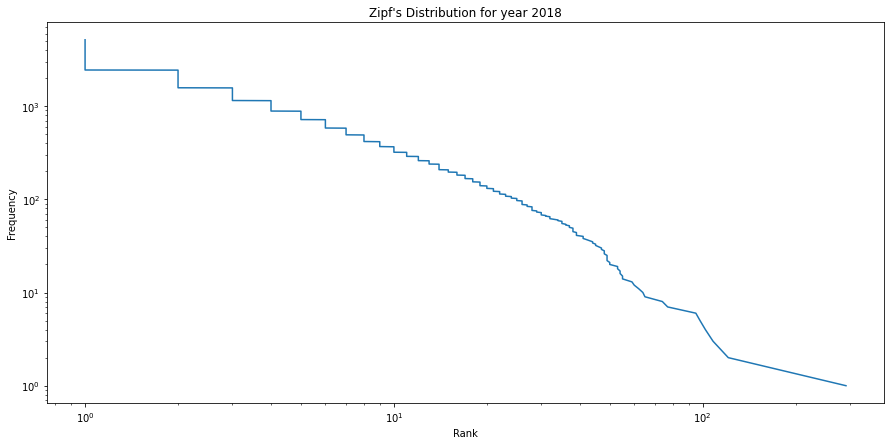

In [181]:
# log-log plot of word frequencies and rank for year 2018
plt.figure(figsize=(15,7))
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Distribution for year 2018")
plt.loglog(df_word_freq_2018['Freq'], df_word_freq_2018['Rank'] )
plt.show()

In [184]:
# Calculating rank for the words according to its frequency for year 2019
df_word_freq_2019['Rank'] = range(1,len(df_word_freq_2019)+1)

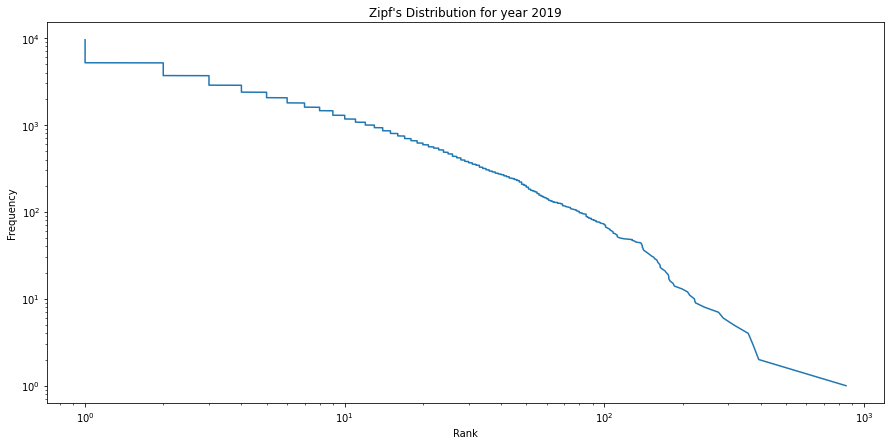

In [185]:
# log-log plot of word frequencies and rank for year 2019
plt.figure(figsize=(15,7))
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Distribution for year 2019")
plt.loglog(df_word_freq_2019['Freq'], df_word_freq_2019['Rank'] )
plt.show()

In [186]:
# Calculating rank for the words according to its frequency for year 2020
df_word_freq_2020['Rank'] = range(1,len(df_word_freq_2020)+1)

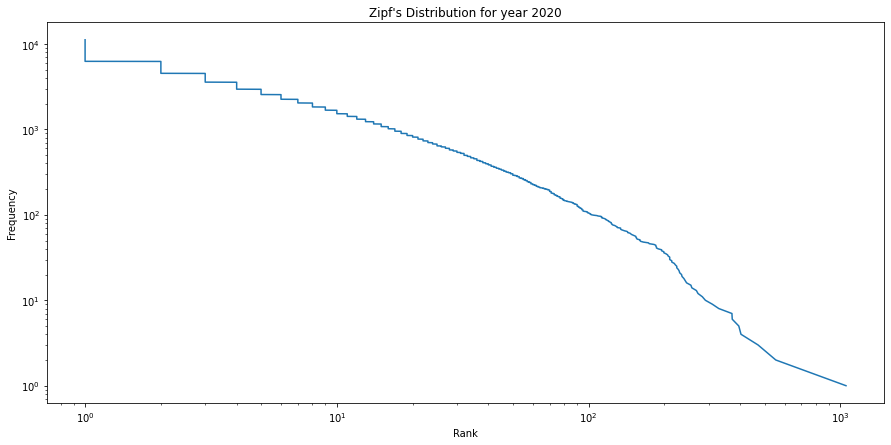

In [187]:
# log-log plot of word frequencies and rank for year 2020
plt.figure(figsize=(15,7))
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Distribution for year 2020")
plt.loglog(df_word_freq_2020['Freq'], df_word_freq_2020['Rank'] )
plt.show()

In [188]:
# Calculating rank for the words according to its frequency for year 2021
df_word_freq_2021['Rank'] = range(1,len(df_word_freq_2021)+1)

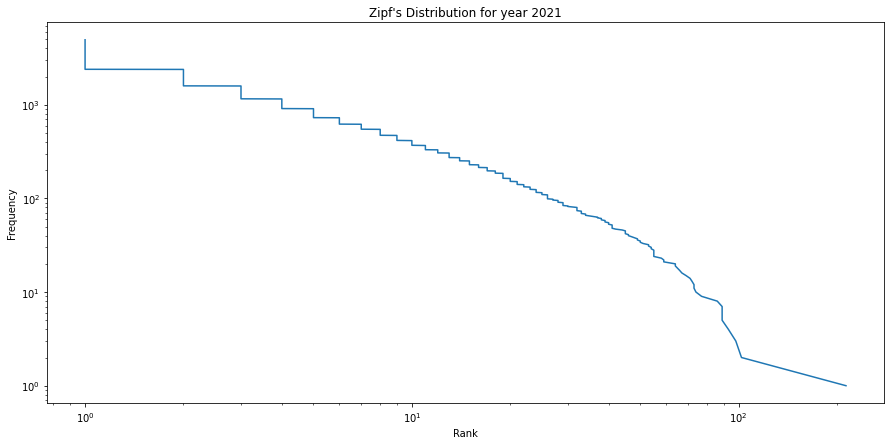

In [189]:
# log-log plot of word frequencies and rank for year 2021
plt.figure(figsize=(15,7))
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Distribution for year 2021")
plt.loglog(df_word_freq_2021['Freq'], df_word_freq_2021['Rank'] )
plt.show()

In [190]:
# Calculating rank for the words according to its frequency for year 2022
df_word_freq_2022['Rank'] = range(1,len(df_word_freq_2022)+1)

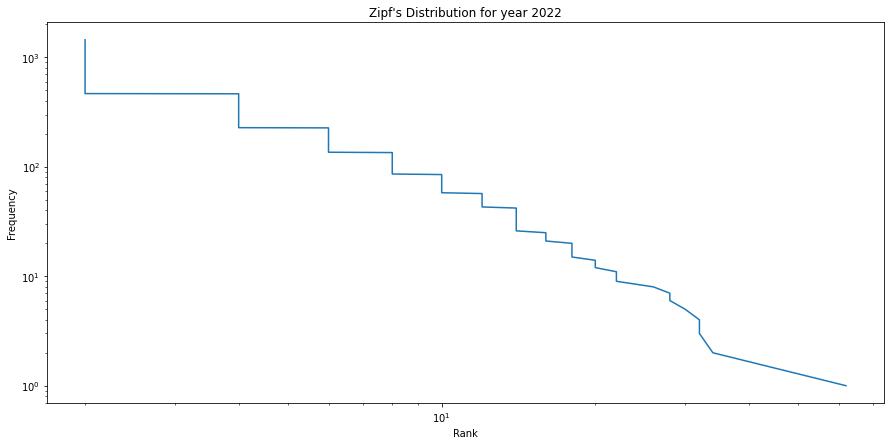

In [191]:
# log-log plot of word frequencies and rank for year 2022
plt.figure(figsize=(15,7))
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Distribution for year 2022")
plt.loglog(df_word_freq_2022['Freq'], df_word_freq_2022['Rank'] )
plt.show()

source-"https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-bigrams/"

In [192]:
# To tokenize tweet column 
def token(string):
    return word_tokenize(string)

In [193]:
tw_df_2017['tokens'] = tw_df_2017['tweet'].apply(token) # To tokanize twitter column for the year 2017 
bigrams_2017 = [list(bigrams(tweet)) for tweet in tw_df_2017['tokens']] # bi-grams for the year 2017
bigrams_2017

[[('coming', 'soon')],
 [('vastly', 'better'),
  ('better', 'maps'),
  ('maps', 'nav'),
  ('nav', 'coming'),
  ('coming', 'soon')],
 [],
 [],
 [('yeah', 'terrible'),
  ('terrible', 'upgrade'),
  ('upgrade', 'old'),
  ('old', 'linux'),
  ('linux', 'os'),
  ('os', 'bunch'),
  ('bunch', 'drivers'),
  ('drivers', 'first'),
  ('first', 'major'),
  ('major', 'browser'),
  ('browser', 'upgrades'),
  ('upgrades', 'coming'),
  ('coming', 'cars'),
  ('cars', 'months'),
  ('months', 'note'),
  ('note', 'slower'),
  ('slower', 'first'),
  ('first', 'code'),
  ('code', 'optimized')],
 [('similar', 'total'),
  ('total', 'size'),
  ('size', 'maybe'),
  ('maybe', 'slightly'),
  ('slightly', 'bigger'),
  ('bigger', 'account'),
  ('account', 'really'),
  ('really', 'gamechanging'),
  ('gamechanging', 'think'),
  ('think', 'feature'),
  ('feature', 'like'),
  ('like', 'add')],
 [('sustainable', 'energy'),
  ('energy', 'production'),
  ('production', 'solar'),
  ('solar', 'batteries'),
  ('batteries', 'gr

In [194]:
# Using itertools to flatten bigrams
bigrams_list = list(itertools.chain(*bigrams_2017))
bigram_counter = collections.Counter(bigrams_list) # To create counter using collections 
df_bigram_2017 = pd.DataFrame(bigram_counter.most_common(20),columns=['bigram', 'count']) # Bigram dataframe using for most_common bigrams
df_bigram_2017.head()

bigram  count
0        (model, x)     34
1    (coming, soon)     27
2  (space, station)     25
3   (falcon, heavy)     22
4    (tesla, model)     22

In [195]:
# To create bigram dictionaries and counts
dictn = df_bigram_2017.set_index('bigram').T.to_dict('records')
G = nx.Graph()  # To create network graph 
# To create connections
for k, v in dictn[0].items():
    G.add_edge(k[0], k[1])

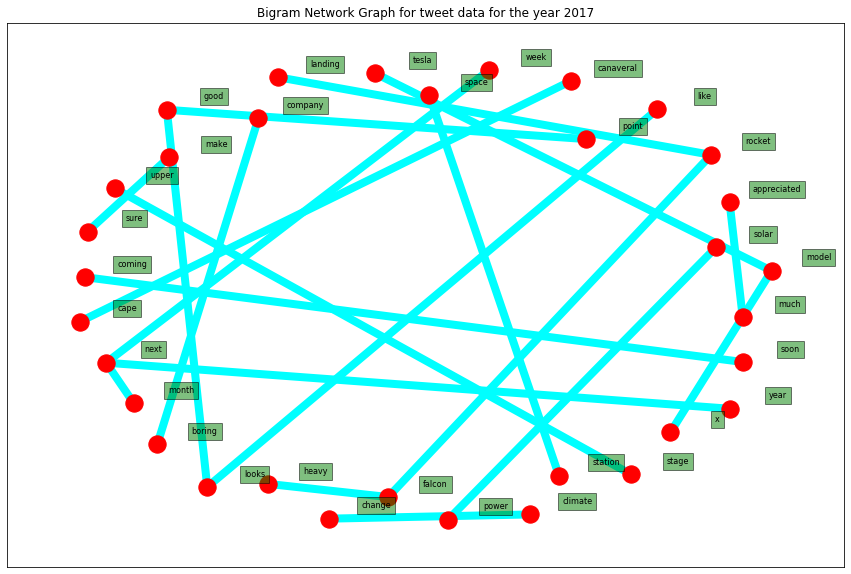

In [196]:
# To plot network graphs and their lables
fig, ax = plt.subplots(figsize=(15, 10))
pos = nx.spring_layout(G, k=5)
nx.draw_networkx(G, pos,font_size=14,width=8,edge_color='cyan',node_color='red',with_labels = False,ax=ax)
for k, v in pos.items():
    x, y = v[0]+.135, v[1]+.045
    ax.text(x, y,s=k,bbox=dict(facecolor='green', alpha=0.50),horizontalalignment='center', fontsize=8)
plt.title('Bigram Network Graph for tweet data for the year 2017')
plt.show()

In [197]:
tw_df_2018['tokens'] = tw_df_2018['tweet'].apply(token) # To tokanize twitter column for the year 2018 
bigrams_2018 = [list(bigrams(tweet)) for tweet in tw_df_2018['tokens']] # bi-grams for the year 2018
bigrams_2018

[[('thanks', 'tesla'),
  ('tesla', 'owners'),
  ('owners', 'china'),
  ('china', 'looking'),
  ('looking', 'forward'),
  ('forward', 'visiting'),
  ('visiting', 'soon'),
  ('soon', 'groundbreaking'),
  ('groundbreaking', 'gigafactory'),
  ('gigafactory', 'shanghai')],
 [('turns', 'take'),
  ('take', 'dayquil'),
  ('dayquil', 'exit'),
  ('exit', 'matrix')],
 [('excited', 'larry'),
  ('larry', 'ellison'),
  ('ellison', 'kathleen'),
  ('kathleen', 'wilson'),
  ('wilson', 'thompson'),
  ('thompson', 'join'),
  ('join', 'tesla'),
  ('tesla', 'board')],
 [],
 [('tesla', 'team'), ('team', 'great'), ('great', 'job')],
 [],
 [],
 [('provide', 'detailed'),
  ('detailed', 'explanation'),
  ('explanation', 'march'),
  ('march', 'april')],
 [('time', 'although'),
  ('although', 'also'),
  ('also', 'turned'),
  ('turned', 'dramatically'),
  ('dramatically', 'better')],
 [],
 [],
 [('probability', 'rising'),
  ('rising', 'rapidly'),
  ('rapidly', 'due'),
  ('due', 'new'),
  ('new', 'architecture')],


In [198]:
# Using itertools to flatten bigrams
bigrams_list = list(itertools.chain(*bigrams_2018))
bigram_counter = collections.Counter(bigrams_list) # To create counter using collections 
df_bigram_2018 = pd.DataFrame(bigram_counter.most_common(20),columns=['bigram', 'count']) # Bigram dataframe using for most_common bigrams
df_bigram_2018.head()

bigram  count
0       (next, year)     25
1     (coming, soon)     22
2  (boring, company)     16
3    (falcon, heavy)     14
4      (tesla, team)     11

In [199]:
# To create bigram dictionaries and counts
dictn = df_bigram_2018.set_index('bigram').T.to_dict('records')
G = nx.Graph()  # To create network graph 
# To create connections
for k, v in dictn[0].items():
    G.add_edge(k[0], k[1])

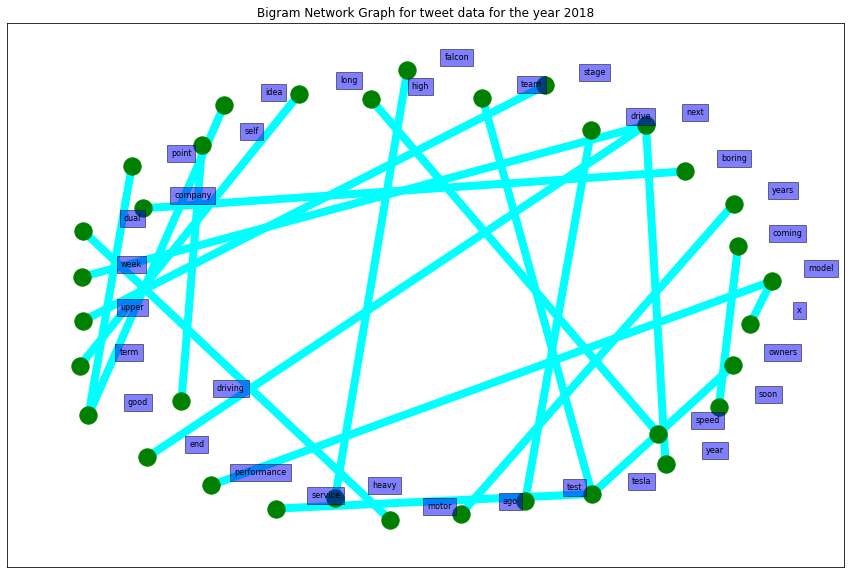

In [200]:
# To plot network graphs and their lables
fig, ax = plt.subplots(figsize=(15, 10))
pos = nx.spring_layout(G, k=5)
nx.draw_networkx(G, pos,font_size=14,width=8,edge_color='cyan',node_color='green',with_labels = False,ax=ax)
for k, v in pos.items():
    x, y = v[0]+.135, v[1]+.045
    ax.text(x, y,s=k,bbox=dict(facecolor='blue', alpha=0.50),horizontalalignment='center', fontsize=8)
plt.title('Bigram Network Graph for tweet data for the year 2018')
plt.show()

In [201]:
tw_df_2019['tokens'] = tw_df_2019['tweet'].apply(token) # To tokanize twitter column for the year 2019 
# bi-grams for the year 2019
bigrams_2019 = [list(bigrams(tweet)) for tweet in tw_df_2019['tokens']]
bigrams_2019

[[('pretty', 'awful'),
  ('awful', 'lie'),
  ('lie', 'left'),
  ('left', 'south'),
  ('south', 'africa'),
  ('africa', 'backpack'),
  ('backpack', 'suitcase'),
  ('suitcase', 'books'),
  ('books', 'worked'),
  ('worked', 'mom'),
  ('mom', 'cousin'),
  ('cousin', 'farm'),
  ('farm', 'saskatchewan'),
  ('saskatchewan', 'lumber'),
  ('lumber', 'mill'),
  ('mill', 'vancouver'),
  ('vancouver', 'went'),
  ('went', 'queens'),
  ('queens', 'univ'),
  ('univ', 'scholarship'),
  ('scholarship', 'debt'),
  ('debt', 'upenn'),
  ('upenn', 'wharton'),
  ('wharton', 'stanford')],
 [('person', 'blocked'),
  ('blocked', 'read'),
  ('read', 'tweet'),
  ('tweet', 'whats'),
  ('whats', 'deal')],
 [('started', 'zip'),
  ('zip', 'k'),
  ('k', 'plus'),
  ('plus', 'overclocked'),
  ('overclocked', 'home'),
  ('home', 'built'),
  ('built', 'pc'),
  ('pc', 'k'),
  ('k', 'bro'),
  ('bro', 'k'),
  ('k', 'greg'),
  ('greg', 'kouri'),
  ('kouri', 'good'),
  ('good', 'guy'),
  ('guy', 'greatly'),
  ('greatly', 'mis

In [202]:
# Using itertools to flatten bigrams
bigrams_list = list(itertools.chain(*bigrams_2019))
bigram_counter = collections.Counter(bigrams_list) # To create counter using collections 
df_bigram_2019 = pd.DataFrame(bigram_counter.most_common(20),columns=['bigram', 'count']) # Bigram dataframe using for most_common bigrams
df_bigram_2019.head()

bigram  count
0   (coming, soon)     69
1     (next, year)     53
2       (model, x)     49
3  (falcon, heavy)     45
4     (next, week)     44

In [203]:
# To create bigram dictionaries and counts
dictn = df_bigram_2019.set_index('bigram').T.to_dict('records')
G = nx.Graph()  # To create network graph 
# To create connections
for k, v in dictn[0].items():
    G.add_edge(k[0], k[1])

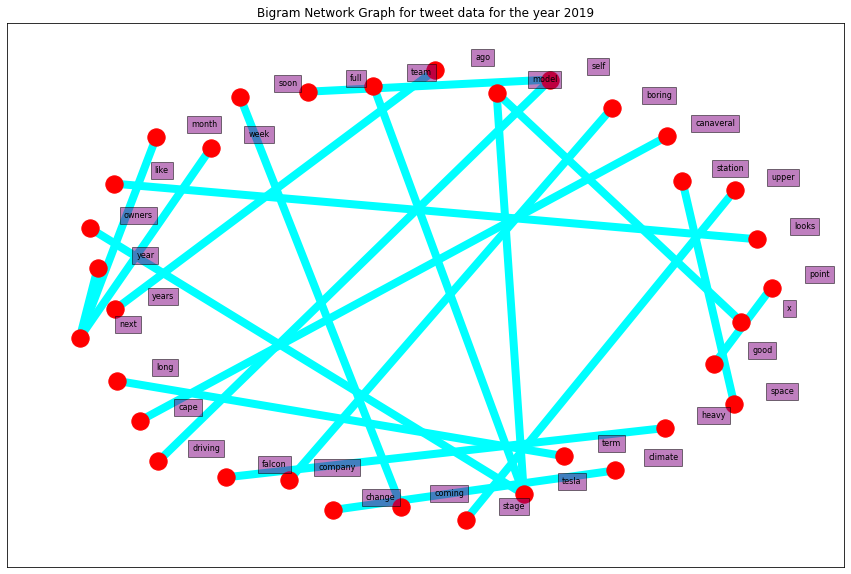

In [204]:
# To plot network graphs and their lables
fig, ax = plt.subplots(figsize=(15, 10))
pos = nx.spring_layout(G, k=5)
nx.draw_networkx(G, pos,font_size=14,width=8,edge_color='cyan',node_color='red',with_labels = False,ax=ax)
for k, v in pos.items():
    x, y = v[0]+.135, v[1]+.045
    ax.text(x, y,s=k,bbox=dict(facecolor='purple', alpha=0.50),horizontalalignment='center', fontsize=8)
plt.title('Bigram Network Graph for tweet data for the year 2019')
plt.show()

In [205]:
tw_df_2020['tokens'] = tw_df_2020['tweet'].apply(token) # To tokanize twitter column for the year 2020 
# bi-grams for the year 2020
bigrams_2020 = [list(bigrams(tweet)) for tweet in tw_df_2020['tokens']]
bigrams_2020

[[('entertainment', 'critical'), ('critical', 'cars'), ('cars', 'drive')],
 [('meeting', 'larry'),
  ('larry', 'ellison'),
  ('ellison', 'seek'),
  ('seek', 'advice'),
  ('advice', 'back'),
  ('back', 'working'),
  ('working', 'tesla'),
  ('tesla', 'end'),
  ('end', 'quarter'),
  ('quarter', 'tomorrow')],
 [],
 [('tesla', 'car'),
  ('car', 'gaming'),
  ('gaming', 'autonomous'),
  ('autonomous', 'world')],
 [],
 [('taste', 'future')],
 [('try', 'playing'),
  ('playing', 'polytopia'),
  ('polytopia', 'tesla'),
  ('tesla', 'great'),
  ('great', 'game'),
  ('game', 'multiplayer'),
  ('multiplayer', 'online'),
  ('online', 'version'),
  ('version', 'coming'),
  ('coming', 'soon')],
 [('focus', 'making'),
  ('making', 'products'),
  ('products', 'services'),
  ('services', 'people'),
  ('people', 'truly'),
  ('truly', 'love'),
  ('love', 'total'),
  ('total', 'economic'),
  ('economic', 'pie'),
  ('pie', 'bigger'),
  ('bigger', 'instead'),
  ('instead', 'engaging'),
  ('engaging', 'zero'),
 

In [206]:
# Using itertools to flatten bigrams
bigrams_list = list(itertools.chain(*bigrams_2020))
bigram_counter = collections.Counter(bigrams_list) # To create counter using collections 
df_bigram_2020 = pd.DataFrame(bigram_counter.most_common(20),columns=['bigram', 'count']) # Bigram dataframe using for most_common bigrams
df_bigram_2020.head()

bigram  count
0  (coming, soon)     88
1    (next, year)     60
2    (next, week)     54
3  (pretty, much)     50
4      (model, x)     50

In [207]:
# To create bigram dictionaries and counts
dictn = df_bigram_2020.set_index('bigram').T.to_dict('records')
G = nx.Graph() # To create network graph 
# To create connections
for k, v in dictn[0].items():
    G.add_edge(k[0], k[1])

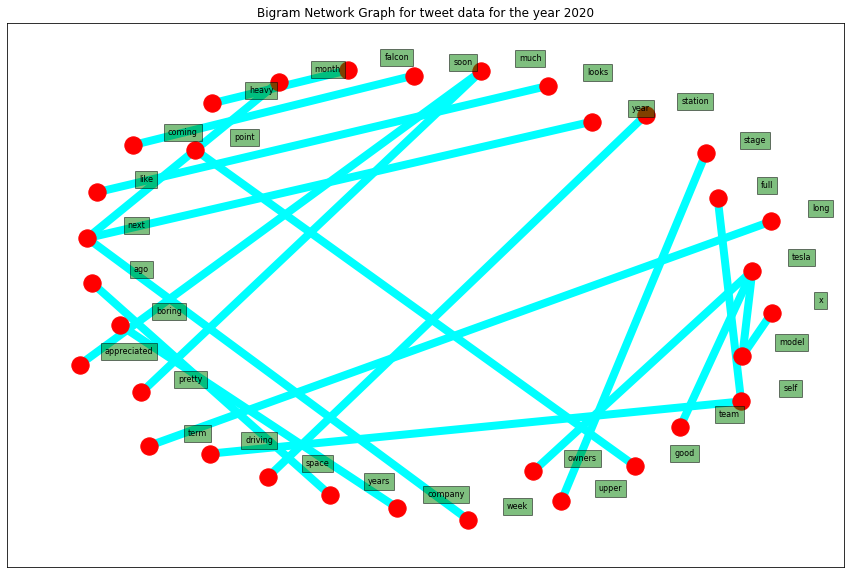

In [208]:
# To plot network graphs and their lables
fig, ax = plt.subplots(figsize=(15, 10))
pos = nx.spring_layout(G, k=5)
nx.draw_networkx(G, pos,font_size=14,width=8,edge_color='cyan',node_color='red',with_labels = False,ax=ax)
for k, v in pos.items():
    x, y = v[0]+.135, v[1]+.045
    ax.text(x, y,s=k,bbox=dict(facecolor='green', alpha=0.50),horizontalalignment='center', fontsize=8)
plt.title('Bigram Network Graph for tweet data for the year 2020')
plt.show()

In [209]:
tw_df_2021['tokens'] = tw_df_2021['tweet'].apply(token) # To tokanize twitter column for the year 2021 
# bi-grams for the year 2021
bigrams_2021 = [list(bigrams(tweet)) for tweet in tw_df_2021['tokens']]
bigrams_2021

[[],
 [('many', 'ui'), ('ui', 'improvements'), ('improvements', 'coming')],
 [('chart', 'big'), ('big', 'deal')],
 [('predicting', 'macroeconomics'),
  ('macroeconomics', 'challenging'),
  ('challenging', 'say'),
  ('say', 'least'),
  ('least', 'gut'),
  ('gut', 'feel'),
  ('feel', 'maybe'),
  ('maybe', 'around'),
  ('around', 'spring'),
  ('spring', 'summer'),
  ('summer', 'later')],
 [('history', 'guide'),
  ('guide', 'many'),
  ('many', 'make'),
  ('make', 'past'),
  ('past', 'next'),
  ('next', 'recession')],
 [],
 [('probably', 'wrong')],
 [],
 [],
 [],
 [],
 [('wow', 'working'),
  ('working', 'problem'),
  ('problem', 'soaked'),
  ('soaked', 'lot'),
  ('lot', 'time'),
  ('time', 'brain'),
  ('brain', 'cycles'),
  ('cycles', 'past'),
  ('past', 'years'),
  ('years', 'starship'),
  ('starship', 'engines'),
  ('engines', 'currently'),
  ('currently', 'two'),
  ('two', 'hardest'),
  ('hardest', 'problems')],
 [('ashok', 'first'),
  ('first', 'person'),
  ('person', 'recruited'),
  ('

In [210]:
# Using itertools to flatten bigrams
bigrams_list = list(itertools.chain(*bigrams_2021))
bigram_counter = collections.Counter(bigrams_list) # To create counter using collections 
df_bigram_2021 = pd.DataFrame(bigram_counter.most_common(20),columns=['bigram', 'count']) # Bigram dataframe using for most_common bigrams
df_bigram_2021.head()

bigram  count
0             (fsd, beta)     21
1            (long, term)     19
2          (pure, vision)     16
3  (life, multiplanetary)     16
4         (self, driving)     16

In [211]:
# To create bigram dictionaries and counts
dictn = df_bigram_2021.set_index('bigram').T.to_dict('records')
G = nx.Graph()  # To create network graph 
# To create connections
for k, v in dictn[0].items():
    G.add_edge(k[0], k[1])

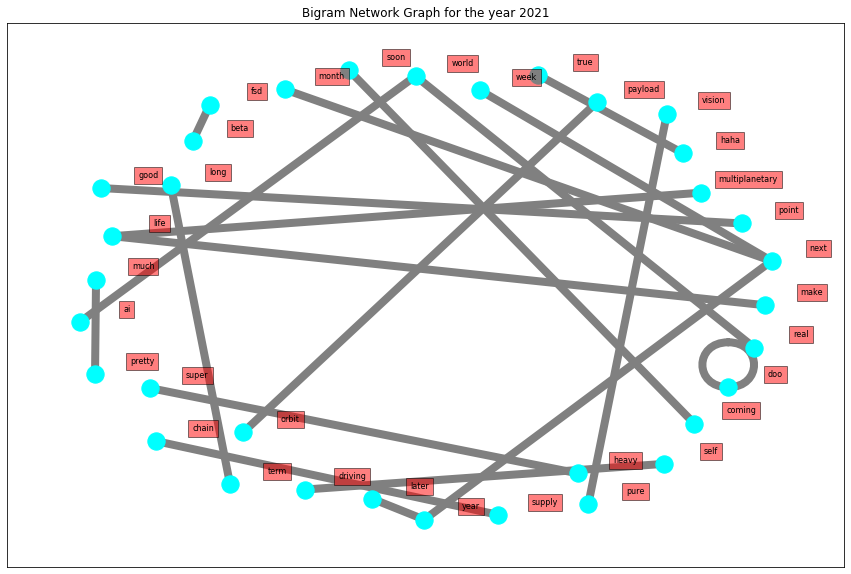

In [212]:
# To plot network graphs and their lables
fig, ax = plt.subplots(figsize=(15, 10))
pos = nx.spring_layout(G, k=5)
nx.draw_networkx(G, pos,font_size=14,width=8,edge_color='grey',node_color='cyan',with_labels = False,ax=ax)
for k, v in pos.items():
    x, y = v[0]+.135, v[1]+.045
    ax.text(x, y,s=k,bbox=dict(facecolor='red', alpha=0.50),horizontalalignment='center', fontsize=8)
plt.title('Bigram Network Graph for the year 2021')
plt.show()

In [217]:
tw_df_2022['tokens'] = tw_df_2022['tweet'].apply(token) # To tokanize twitter column for the year 2022 
# bi-grams for the year 2022
bigrams_2022 = [list(bigrams(tweet)) for tweet in tw_df_2022['tokens']]
bigrams_2022

[[('way', 'free'), ('free', 'qa'), ('qa', 'haha')],
 [('beautiful', 'home'), ('home', 'life')],
 [('starlink', 'terminals'),
  ('terminals', 'near'),
  ('near', 'conflict'),
  ('conflict', 'areas'),
  ('areas', 'jammed'),
  ('jammed', 'several'),
  ('several', 'hours'),
  ('hours', 'time'),
  ('time', 'latest'),
  ('latest', 'software'),
  ('software', 'update'),
  ('update', 'bypasses'),
  ('bypasses', 'jamming'),
  ('jamming', 'curious'),
  ('curious', 'see'),
  ('see', 'next')],
 [],
 [('news', 'sources'),
  ('sources', 'partially'),
  ('partially', 'propaganda'),
  ('propaganda', 'others')],
 [('starlink', 'told'),
  ('told', 'governments'),
  ('governments', 'ukraine'),
  ('ukraine', 'block'),
  ('block', 'russian'),
  ('russian', 'news'),
  ('news', 'sources'),
  ('sources', 'unless'),
  ('unless', 'gunpoint'),
  ('gunpoint', 'sorry'),
  ('sorry', 'free'),
  ('free', 'speech'),
  ('speech', 'absolutist')],
 [('spacex', 'reprioritized'),
  ('reprioritized', 'cyber'),
  ('cyber', '

In [218]:
# Using itertools to flatten bigrams
bigrams_list = list(itertools.chain(*bigrams_2022))
bigram_counter = collections.Counter(bigrams_list) # To create counter using collections 
df_bigram_2022 = pd.DataFrame(bigram_counter.most_common(20),columns=['bigram', 'count']) # Bigram dataframe using for most_common bigrams
df_bigram_2022.head()

bigram  count
0          (birth, rate)      8
1             (model, x)      8
2  (sustainable, energy)      6
3          (work, tesla)      6
4        (self, driving)      6

In [219]:
# To create bigram dictionaries and counts
dictn = df_bigram_2022.set_index('bigram').T.to_dict('records')
G = nx.Graph()   # To create network graph 
# To create connections
for k, v in dictn[0].items():
    G.add_edge(k[0], k[1])

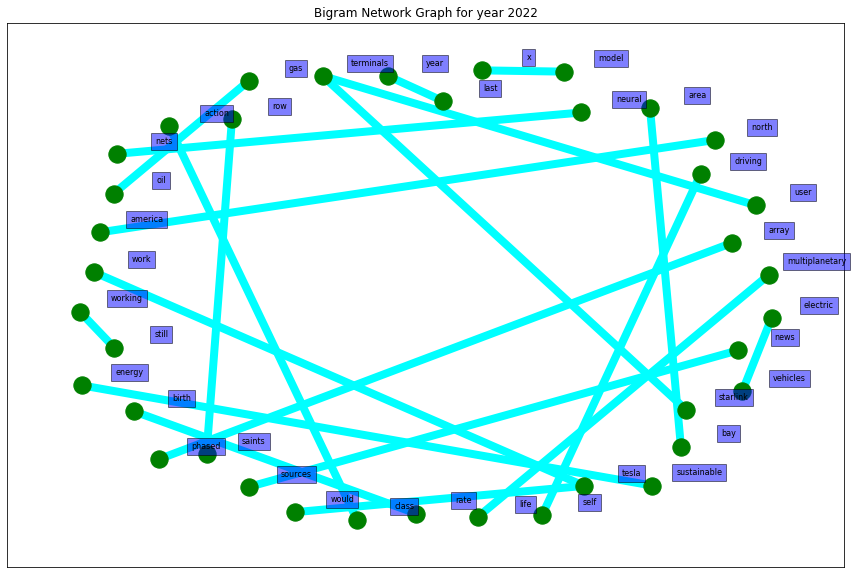

In [220]:
# To plot network graphs and their lables
fig, ax = plt.subplots(figsize=(15, 10))
pos = nx.spring_layout(G, k=5)
nx.draw_networkx(G, pos,font_size=14,width=8,edge_color='cyan',node_color='green',with_labels = False,ax=ax)
for k, v in pos.items():
    x, y = v[0]+.135, v[1]+.045
    ax.text(x, y,s=k,bbox=dict(facecolor='blue', alpha=0.50),horizontalalignment='center', fontsize=8)
plt.title('Bigram Network Graph for year 2022')
plt.show()